># Titanic Disaster Challenge

## The challenge is able to predict deaths and survivals of the great Titanic disaster beginning in the 20th century.
## For the ML will make use of knn algorithms and decision tree classifier. And it is based on the data proposed by Kaggle: https://www.kaggle.com/c/titanic/data

## - Importing library to work the data:

In [134]:
#byBalalex
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Scikit-learn algorithms and functions for Machine Learning.
# For KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier 
# For Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 
# For K-Folds cross-validator
from sklearn.model_selection import KFold 
# For evaluating cross-validator
from sklearn.model_selection import cross_val_score 
# For KFold configuration
k_fold = KFold(n_splits=10, shuffle=True, random_state=0) 

## - Read the data:

In [154]:
df_trainning = pd.read_csv('train.csv')


In [155]:
df_test = pd.read_csv('test.csv')


## - Explorating Data Analysis:
>### Data Dictionary:
    * PassengerId: Unique passenger ID
    * Survived: 0 = No, 1 = Yes
    * Class P: passenger class 1 = 1 °, 2 = 2 °, 3 = 3 °
    * Name: passenger name
    * Sex: passenger sex
    * Age: age of passenger
    * SibSp: number of siblings or spouses on the boat
    * Parch: number of parents or children on the boat.
    * Ticket: Ticket ID
    * Fare: the amount paid for the ticket
    * Cabin: cabin number
    * Embarked: port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [4]:
df_trainning

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df_trainning.shape

(891, 12)

In [6]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
df_test.shape

(418, 11)

### There are 1309 passengers in both data sets.
* 891 in train data set.
* 418 in test data set.

### Verifying more information about the data to work with:

In [8]:
df_trainning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## - Checking for null numbers: 

In [10]:
np.sum(df_trainning.isnull())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
np.sum(df_test.isnull())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## - Viewing details about passengers who survived or did not survive:

### The function gets graphs from survived in different contexts for example: By sex or class.

In [12]:
def showSurvivedChart(column):
    survived = df_trainning[df_trainning['Survived']==1][column].value_counts()
    dead = df_trainning[df_trainning['Survived']==0][column].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(12,8))

### By sex context in different graphs.

<AxesSubplot:xlabel='Survived', ylabel='count'>

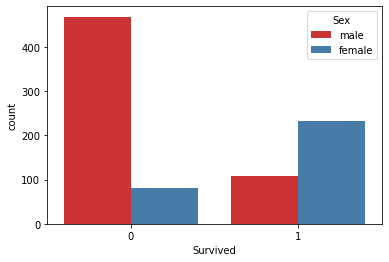

In [13]:
sns.countplot(x='Survived',data=df_trainning,hue='Sex', palette='Set1')

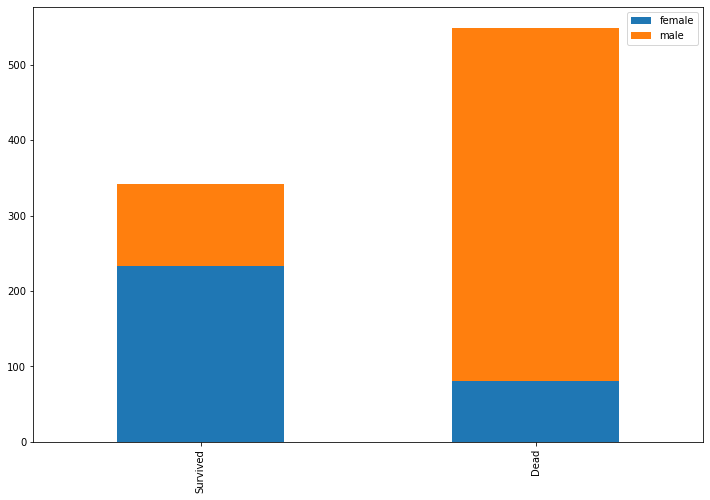

In [14]:
showSurvivedChart('Sex')

### By passengers class context.

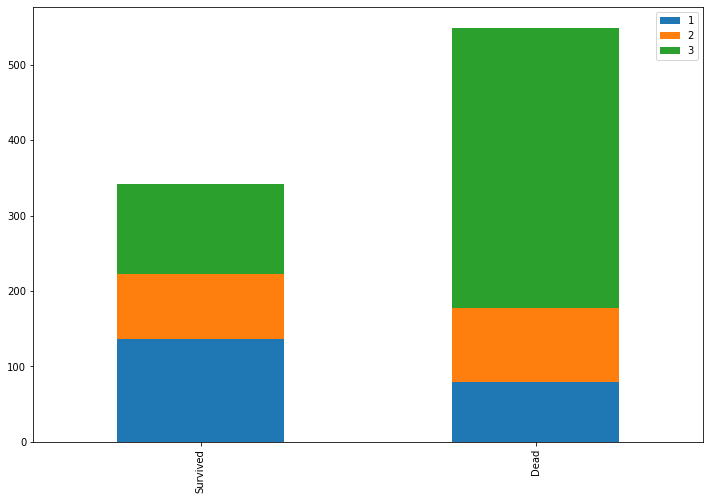

In [15]:
showSurvivedChart('Pclass')

## - Apply Feature Engineering:

In [17]:
np.sum(df_trainning.isnull())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### There is a lot of missing data in the Age and Cabin column, so it will be replaced in the Age column by the mean value.

In [47]:
df_trainning.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### For get the average value and replace the lost values in age, it is advisable to separate the mean value by sex separated.

In [156]:
df_trainning['Age'].fillna(df_trainning.groupby('Sex')['Age'].transform('median'), inplace=True)
df_trainning.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [157]:
df_test['Age'].fillna(df_trainning.groupby('Sex')['Age'].transform('median'), inplace=True)
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,29.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,NaN,S


In [158]:
np.sum(df_trainning.isnull())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [159]:
np.sum(df_test.isnull())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Now let's group people by age where:
    * Age 1: age <= 18
    * Age 2: age > 18 and <= 40
    * Age 3: age > 40 and <= 60
    * Age 4: age > 60

In [160]:
df_trainning.loc[df_trainning['Age'] <= 18, 'Age'] =1
df_trainning.loc[(df_trainning['Age'] > 18) & (df_trainning['Age'] <= 40), 'Age'] =2
df_trainning.loc[(df_trainning['Age'] > 40) & (df_trainning['Age'] <= 60), 'Age'] =3
df_trainning.loc[df_trainning['Age'] > 60, 'Age'] =4

In [161]:
df_test.loc[df_test['Age'] <= 18, 'Age'] =1
df_test.loc[(df_test['Age'] > 18) & (df_test['Age'] <= 40), 'Age'] =2
df_test.loc[(df_test['Age'] > 40) & (df_test['Age'] <= 60), 'Age'] =3
df_test.loc[df_test['Age'] > 60, 'Age'] =4

In [162]:
df_trainning.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,2.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,3.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,1.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,2.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,1.0,1,0,237736,30.0708,NaN,C


In [163]:
df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,2.0,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,3.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,4.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,2.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,2.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,1.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,2.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,2.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,1.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,2.0,2,0,A/4 48871,24.1500,NaN,S


### Visualization by age classification.

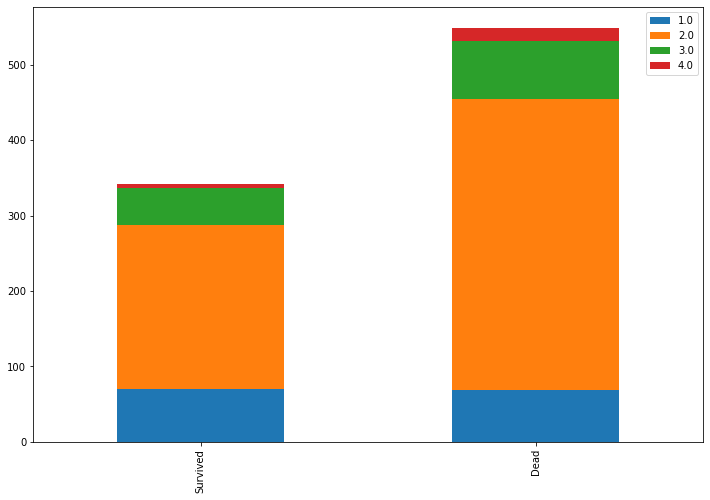

In [164]:
showSurvivedChart('Age')

### Now, it's necessary that the DataFrames replace number with sex, because ML train with numbers.

In [165]:
sex_values = {"male": 0, "female": 1}
df_trainning.replace({'Sex': sex_values}, inplace= True)
df_test.replace({'Sex': sex_values}, inplace= True)
df_trainning.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,S


In [166]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,2.0,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,3.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,4.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,2.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,2.0,1,1,3101298,12.2875,NaN,S


### Here the titles of the passengers are obtained and are classified as follows.
   * Title 1: Mr
   * Title 2: Miss
   * Title 3: Mrs
   * Title 4: everything else

In [167]:
df_trainning['Title'] = df_trainning['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df_test['Title'] = df_test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [168]:
df_trainning['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Jonkheer      1
Lady          1
Capt          1
Mme           1
Ms            1
Don           1
Countess      1
Sir           1
Name: Title, dtype: int64

In [169]:
df_test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

In [170]:
title_values = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3, "Sir": 3, "Mme":
                3, "Ms": 3, "Countess": 3, "Capt": 3, "Don": 3, "Dona": 3, "Jonkheer": 3, "Lady": 3}

### Visualization of survivors by passenger title.

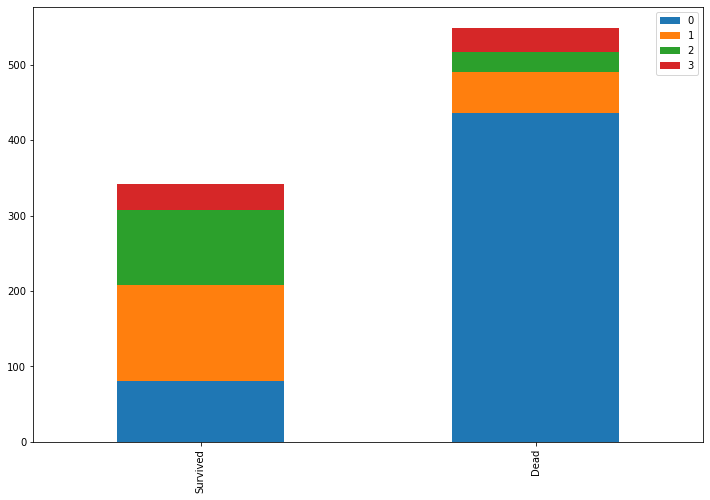

In [171]:
df_trainning.replace({'Title': title_values}, inplace= True)
df_test.replace({'Title': title_values}, inplace= True)
showSurvivedChart('Title')

### Delete or discard unnecessary features for train ML:

In [172]:
columns_drop = ['Name', 'Ticket', 'Fare', 'Cabin', 'Embarked']
df_trainning = df_trainning.drop(columns_drop, axis=1)
df_test = df_test.drop(columns_drop, axis=1)
df_trainning = df_trainning.drop(['PassengerId'], axis=1)

In [173]:
df_trainning.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Title
0,0,3,0,2.0,1,0,0
1,1,1,1,2.0,1,0,2
2,1,3,1,2.0,0,0,1
3,1,1,1,2.0,1,0,2
4,0,3,0,2.0,0,0,0


In [174]:
df_trainning_data = df_trainning.drop('Survived', axis=1)
target = df_trainning['Survived']

In [175]:
df_trainning_data.head()

,Pclass,Sex,Age,SibSp,Parch,Title
0,3,0,2.0,1,0,0
1,1,1,2.0,1,0,2
2,3,1,2.0,0,0,1
3,1,1,2.0,1,0,2
4,3,0,2.0,0,0,0


## - Build and training a ML model:

### * First Step Is Apply KNN Classifier.

In [176]:
classifier = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(classifier, df_trainning_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.76404494 0.82022472 0.79775281 0.80898876 0.83146067
 0.82022472 0.79775281 0.82022472 0.84269663]


In [177]:
scorePercentage = round(np.mean(score)*100, 2)
print('The result of KNN classifier score is ' + str(scorePercentage) + '%')

The result of KNN classifier score is 81.26%


### * Second Step Is Apply Decision Tree Classifier.

In [178]:
classifierDT = DecisionTreeClassifier()
scoringDT = 'accuracy'
scoreDT = cross_val_score(classifierDT, df_trainning_data, target, cv=k_fold, n_jobs=1, scoring=scoringDT)
print(scoreDT)

[0.8        0.79775281 0.78651685 0.78651685 0.86516854 0.78651685
 0.84269663 0.80898876 0.78651685 0.84269663]


In [179]:
scoreDT_Percentage = round(np.mean(scoreDT)*100, 2)
print('The result of decision tree classifier score is ' + str(scoreDT_Percentage) + '%')

The result of decision tree classifier score is 81.03%


## - Testing model on the test data to predict outcomes:

In [180]:
classifierDT.fit(df_trainning_data, target)

df_test_data = df_test.drop("PassengerId", axis=1).copy()
prediction_data = classifierDT.predict(df_test_data)

In [181]:
prediction_data

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# Finally we can see that it gives us a satisfactory result in terms of the final prediction about unconfirmed survivors in the data set!

In [185]:
df_results_prediction = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': prediction_data})
df_results_prediction.to_csv('titanic-final_prediction.csv', index=False)
final_prediction = pd.read_csv('titanic-final_prediction.csv')
final_prediction.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
